In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Dowload a WMTS as jpg

The tiles download are those covering Amsterdam, Netherlands. The WMTS is provided by [pdok](https://www.pdok.nl/introductie/-/article/luchtfoto-pdok).

In [2]:
from io import BytesIO

import matplotlib.pyplot as plt
from owslib.wmts import WebMapTileService
from PIL import Image

from building_detector import helpers


wmts_url = 'https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wmts'
layer_name = 'Actueel_ortho25'

In [3]:
wmts = WebMapTileService(wmts_url, version='1.1.1')
wmts.identification.title

'Landelijke Voorziening Beeldmateriaal'

In [4]:
print('The WMTS contains the following layers:')
wmts.contents

The WMTS contains the following layers:


{'2016_ortho25': <owslib.wmts.ContentMetadata at 0x7fe1b8a31fa0>,
 '2017_ortho25': <owslib.wmts.ContentMetadata at 0x7fe188084340>,
 '2018_ortho25': <owslib.wmts.ContentMetadata at 0x7fe188084370>,
 '2019_ortho25': <owslib.wmts.ContentMetadata at 0x7fe188084880>,
 'Actueel_ortho25': <owslib.wmts.ContentMetadata at 0x7fe188084b50>}

Get the tiles for a given coordinates at different zoom levels.

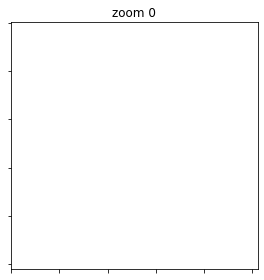

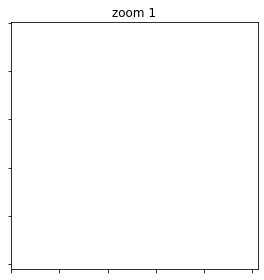

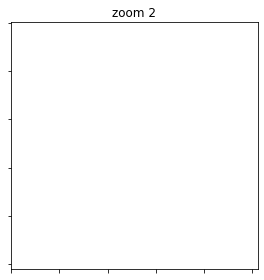

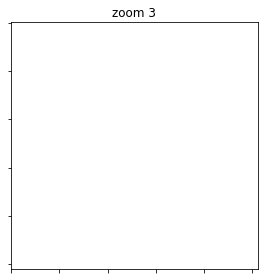

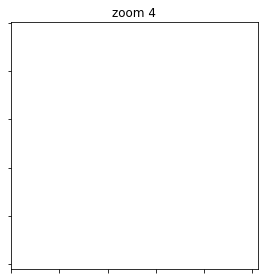

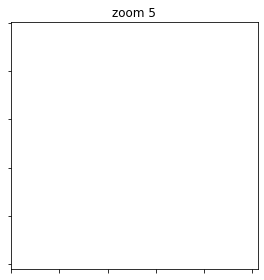

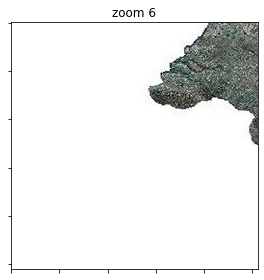

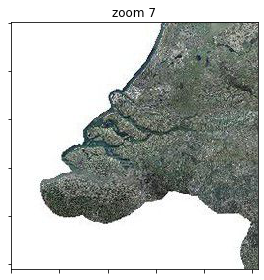

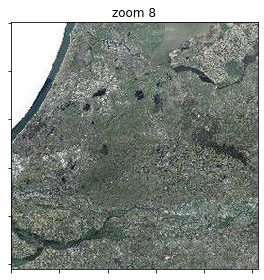

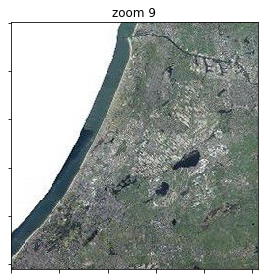

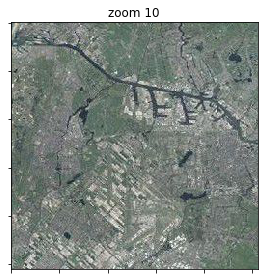

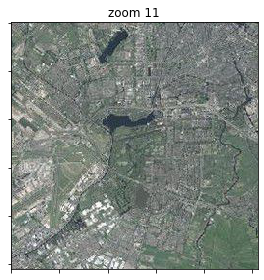

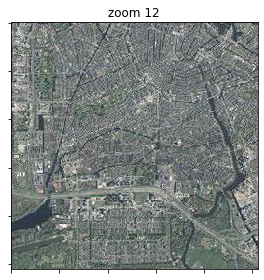

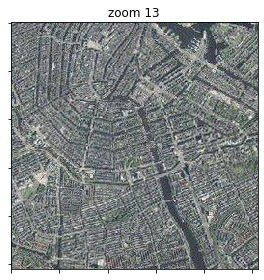

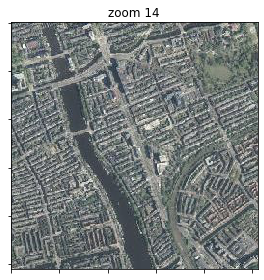

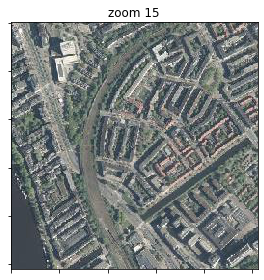

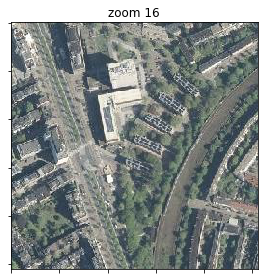

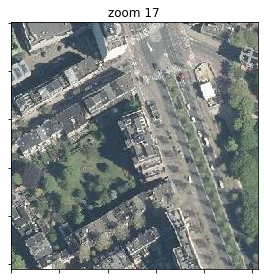

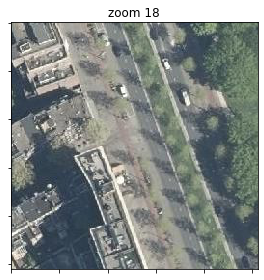

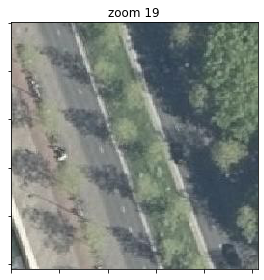

In [5]:
amsterdam = 52.3522554, 4.9130319

for zoom in range(20):
    col, row = helpers.wgs84_to_tile_number(*amsterdam, zoom)

    tile = wmts.gettile(
        layer=layer_name, 
        tilematrixset='EPSG:3857', 
        tilematrix=f'{zoom:02d}', 
        row=row,
        column=col,
        format="image/jpeg"
    )

    image_bytes = BytesIO()
    image_bytes.write(tile.read())
    image = Image.open(image_bytes)
    
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title(f'zoom {zoom}')
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.tight_layout()